In [197]:
import os
import pandas as pd
import yfinance as yf
import time
from datetime import datetime, timedelta

# ファイルパスを指定
file_path = 'ai_results/'

# ファイル名を取得
file_names = os.listdir(file_path)

# CSVファイルのみを取得
csv_files = [f for f in file_names if f.endswith('.csv')]

In [198]:
len(csv_files)

474

In [252]:
result_list = []
res_df = pd.DataFrame(columns=['epoch', 'train_loss', 'result'])

for csv_file in csv_files:
    df = pd.read_csv(os.path.join(file_path, csv_file), header=0)
    split_list = csv_file.split('_')
    res_df.loc[len(res_df)] = [int(split_list[-1].split('.')[0]), split_list[4], df['result'].prod()]
    # time.sleep(2)

In [255]:
test = res_df.apply(pd.to_numeric)
test = res_df.sort_values(by='epoch')

In [256]:
test

,epoch,train_loss,result
470,26,0.49391,1.259590
467,27,0.48742,1.259590
466,28,0.48281,1.441098
465,29,0.47687,1.084523
463,30,0.46963,1.556540
...,...,...,...
15,495,0.16627,0.834474
78,496,0.19151,0.940587
54,497,0.18387,0.543618
112,498,0.20104,1.294559


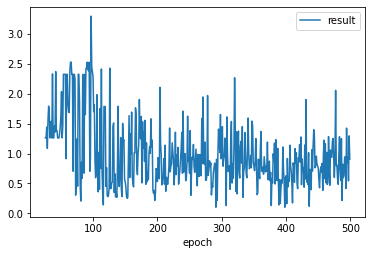

In [257]:
import matplotlib.pyplot as plt

test.plot(x='epoch', y='result')
# グラフを表示する
plt.show()

In [230]:
test

,epoch,train_loss,result
272,100,0.26985,2.287073
298,101,0.27925,1.699209
335,102,0.29847,1.815169
330,103,0.29525,0.895314
352,104,0.30806,0.595470
...,...,...,...
274,95,0.27027,0.703377
308,96,0.28184,0.932061
314,97,0.28600,3.294862
301,98,0.28003,2.438063


In [259]:
import matplotlib.pyplot as plt
# データフレームの中身を数値に変換する
df = res_df.apply(pd.to_numeric)

In [260]:
from matplotlib.colors import Normalize

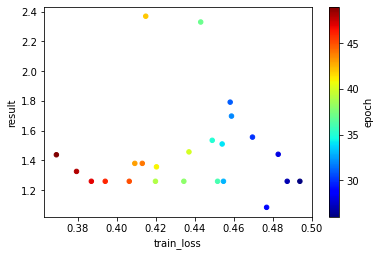

In [261]:
df
# 'A'列が1より大きい行を抽出する
df_filtered = df.query('50 > epoch')

df_filtered.plot(kind='scatter', x='train_loss', y='result', c='epoch', cmap='jet')
# グラフのレイアウトを調整する
plt.rcParams['figure.subplot.bottom'] = 0.15



# グラフを表示する
plt.show()

In [227]:
df_filtered

,epoch,train_loss,result
261,99,0.26548,2.368691
274,95,0.27027,0.703377
288,93,0.27662,2.383193
301,98,0.28003,2.438063
308,96,0.28184,0.932061
...,...,...,...
463,30,0.46963,1.556540
465,29,0.47687,1.084523
466,28,0.48281,1.441098
467,27,0.48742,1.259590


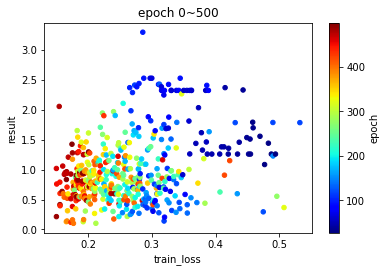

In [212]:
# 散布図を描く
df.plot(kind='scatter', x='train_loss', y='result', c='epoch', cmap='jet')
# グラフのレイアウトを調整する
plt.rcParams['figure.subplot.bottom'] = 0.15

plt.title('epoch 0~500')
# グラフを表示する
plt.show()

In [208]:
# リスト内の全要素を掛け合わせる
result_nums = []
result = 1
for num in result_list:
    result *= num
    result_nums.append(result)

# 結果を表示する
print(result)

1.8816698294111986


In [25]:
import csv

# CSVファイルに書き込む
with open('output.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for num in result_nums:
        writer.writerow([num])

In [27]:
import csv

# CSVファイルに書き込む
with open('output_2.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for num in result_list:
        writer.writerow([num])

In [45]:
# 株式のシンボルを指定してyfinanceからデータを取得する
msft = yf.Ticker("SANG")

# 特定の日時の株式データを取得する
# specific_date = '2022-01-05'
# specific_end_date = '2022-01-04'
specific_data = msft.history(start='2022-01-05' ,end='2022-01-06')

print(float(specific_data['Close'][0]) / float(specific_data['Open'][0]))

1.0430107122579966


In [14]:
base_df = pd.read_csv('../database/normaraze_stock_price/dataset_20231012.csv')

In [21]:
# 特定の文字列を含む行のインデックスを取得
indices = base_df[base_df['name'].str.contains(df['name'][0])].index

# 結果を表示
print(indices[0])

786


In [89]:
import csv

In [136]:
import yfinance as yf

In [201]:
money = 1
start_date_list = ['2023-09-14', '2023-09-15']
ticker_list =  [result_df.iloc[0]['name'], result_df.iloc[1]['name']]

print(result_df.iloc[1]['name'])

APA


In [202]:
for ticker, date in zip(ticker_list, start_date_list):
    money = caliculate_money(money, date, ticker)

                            Open  High    Low  Close  Volume  Dividends  \
Date                                                                      
2023-09-14 00:00:00-04:00  1.595  1.62  1.595   1.61    5900        0.0   

                           Stock Splits  
Date                                     
2023-09-14 00:00:00-04:00           0.0  
                                Open   High        Low      Close   Volume  \
Date                                                                         
2023-09-15 00:00:00-04:00  42.759998  43.25  42.040001  42.459999  9349600   

                           Dividends  Stock Splits  
Date                                                
2023-09-15 00:00:00-04:00        0.0           0.0  


In [205]:
print(f"結果は{money}, 増減としては{(money-1.)*100}%になります")

結果は1.0023225143844883, 増減としては0.23225143844882723%になります

